In [1]:
from sklearn import datasets
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
iris = datasets.load_iris()

In [3]:
x, y = iris['data'], iris['target']

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=4)

# BaggingClassifier
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

tree = DecisionTreeClassifier()
bag = BaggingClassifier(tree, n_estimators=100, max_samples=0.8,
                        random_state=1)

bag.fit(x_train, y_train)
bag.predict(x_test)

array([2, 0, 2, 2, 2, 1, 2, 0, 0, 2, 0, 0, 0, 1, 2, 0, 1, 0, 0, 2, 0, 2,
       1, 0, 0, 0, 0, 0, 0, 2, 1, 0, 2, 0, 1, 2, 2, 1])

In [6]:
print("train score:", bag.score(x_train, y_train))
print("test score:", bag.score(x_test, y_test))

train score: 1.0
test score: 0.9736842105263158


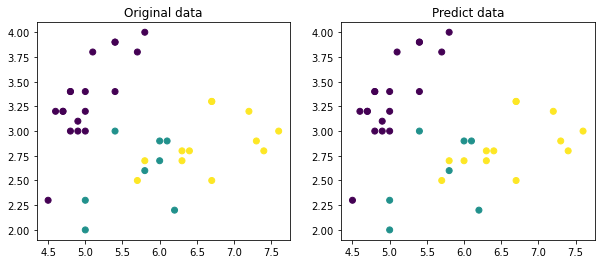

In [7]:
plt.figure(figsize=(10, 4))

plt.subplot(121)
plt.title('Original data')
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test)

plt.subplot(122)
plt.title('Predict data')
plt.scatter(x_test[:, 0], x_test[:, 1], c=bag.predict(x_test))

plt.show()

# BaggingRegressor
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingRegressor.html

In [8]:
x, y = make_regression(n_samples=100, n_features=1, noise=20)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=4)

In [9]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor

tree = DecisionTreeRegressor(max_depth=10, random_state=0)
bag_reg = BaggingRegressor(tree, n_estimators=100, max_samples=0.8,
                        random_state=1)

bag_reg.fit(x_train, y_train)
bag_reg.predict(x_test)

array([ 1.28077716e+02,  6.95860030e+01, -5.42439197e+01,  1.51686877e+02,
       -1.23280310e+01,  1.60156079e+00, -6.04474852e+00, -2.44624911e+01,
       -6.04474852e+00, -6.38406601e+01,  6.39924159e+01,  1.65364433e+02,
        7.70117805e+00, -6.55825624e+01, -6.13496149e+01,  1.46374307e+02,
        5.32623902e+01, -8.56621141e+01, -8.42982444e+01, -8.42982444e+01,
       -2.67936340e+01,  1.14314147e-02,  5.42762976e+01,  1.28046756e+02,
       -7.24042265e+01])

In [10]:
from sklearn.metrics import mean_squared_error

print("train score:", bag_reg.score(x_train, y_train))
print("test score:", bag_reg.score(x_test, y_test))

print("mse:", mean_squared_error(bag_reg.predict(x_test), y_test))

train score: 0.9803158198916787
test score: 0.901967866716368
mse: 562.3995619830911


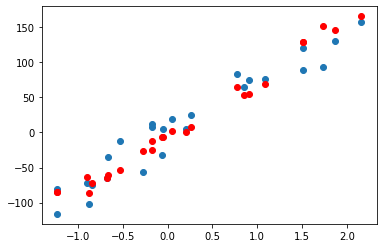

In [11]:
plt.scatter(x_test, y_test)
plt.scatter(x_test, bag_reg.predict(x_test), color="red")